In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [4]:
df.drop(columns=['RowNumber','CustomerId'],inplace = True)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop(columns='Surname',inplace = True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
for col in df.columns:
    print(f'{col}:{df[col].unique()}')


CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

In [10]:
for i,pred in enumerate(df.columns):
    print(df.columns[i])

CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


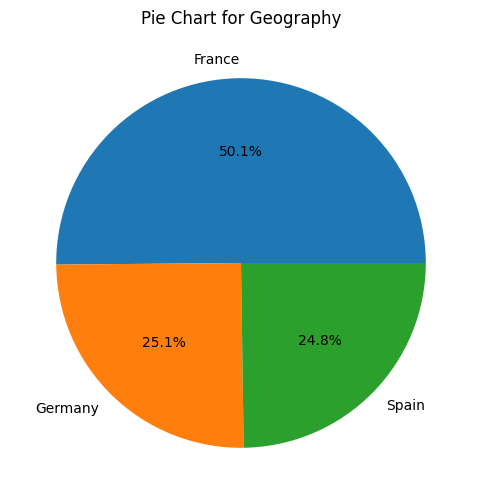

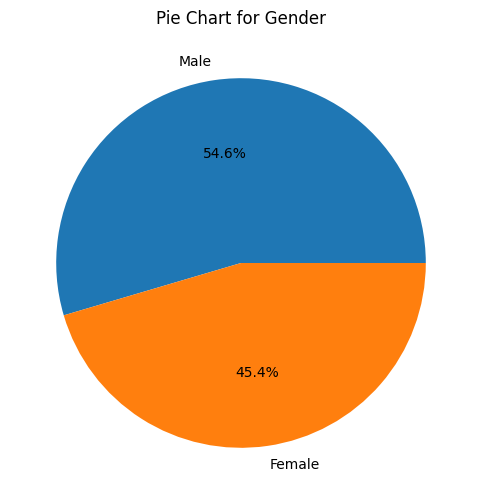

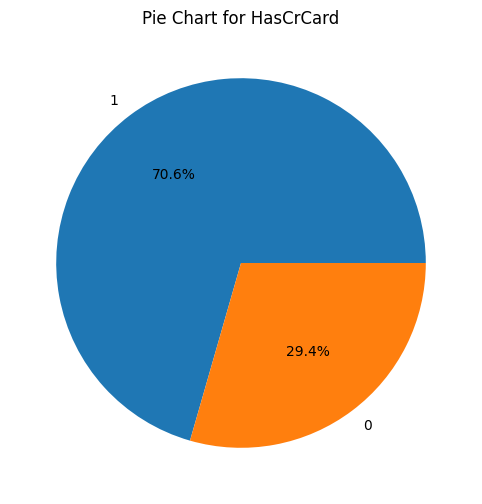

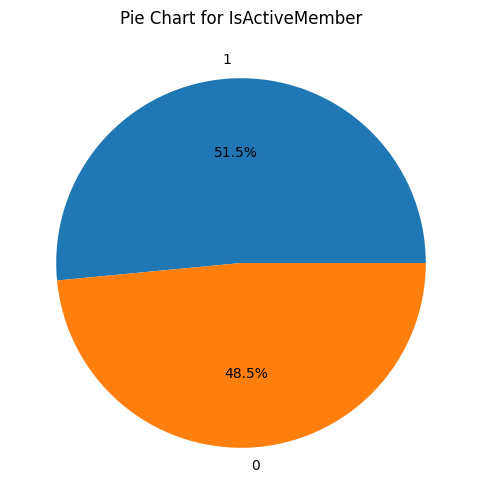

In [12]:
# Get value counts for the entire DataFrame
df_value_counts = {}
df_columns= ['Geography','Gender','HasCrCard','IsActiveMember']
for col in df_columns:
        df_value_counts[col] = df[col].value_counts()

# Plot pie chart for each column
for col, counts in df_value_counts.items():
    plt.figure(figsize=(8, 6))
    counts.plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie Chart for {col}')
    plt.ylabel('')
    plt.show()

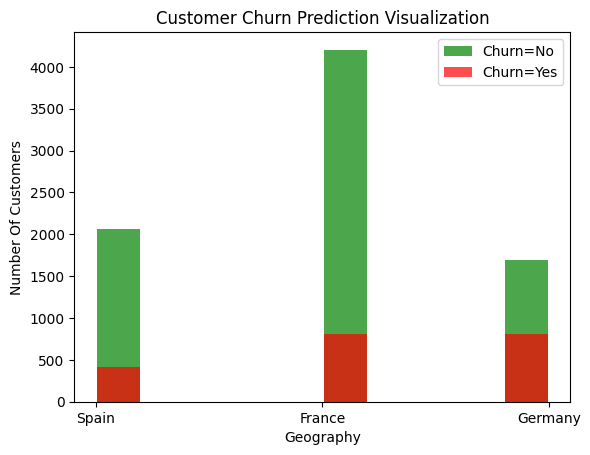

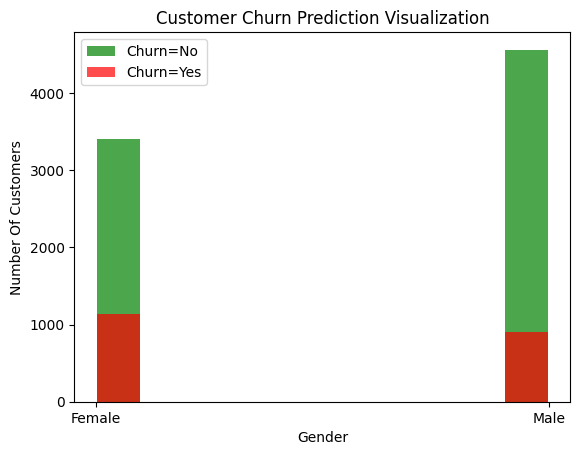

In [13]:
for col in df:
    if df[col].dtypes == 'object':
        x = col
        nochurn = df[df['Exited'] == 0][x]
        churn = df[df['Exited'] == 1][x]
        plt.hist(nochurn, rwidth=0.95, color='green', alpha=0.7, label='Churn=No')
        plt.hist(churn, rwidth=0.95, color='red', alpha=0.7, label='Churn=Yes')
        plt.xlabel(x)
        plt.ylabel("Number Of Customers")
        plt.title("Customer Churn Prediction Visualization")
        plt.legend()
        plt.show()

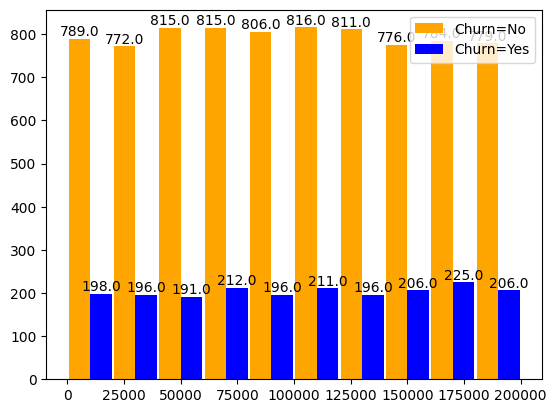

In [14]:
#Data Visualization
tenure_nochurn = df[df['Exited']==0].EstimatedSalary
tenure_churn = df[df['Exited']==1].EstimatedSalary
plt.hist([tenure_nochurn,tenure_churn], rwidth=0.95, color=['orange','blue'],label=['Churn=No','Churn=Yes'])
plt.legend()
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

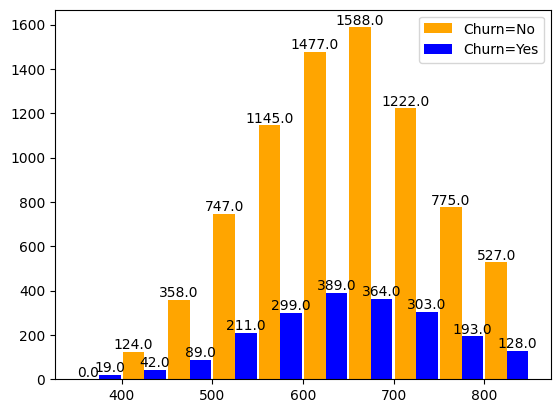

In [15]:
#Data Visualization
tenure_nochurn = df[df['Exited']==0].CreditScore
tenure_churn = df[df['Exited']==1].CreditScore
plt.hist([tenure_nochurn,tenure_churn], rwidth=0.95, color=['orange','blue'],label=['Churn=No','Churn=Yes'])
plt.legend()
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

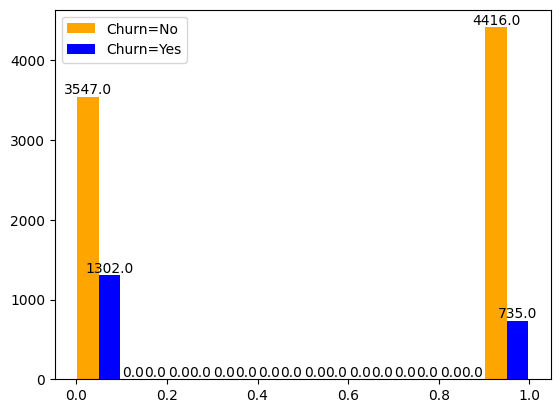

In [16]:
#Data Visualization
tenure_nochurn = df[df['Exited']==0].IsActiveMember
tenure_churn = df[df['Exited']==1].IsActiveMember
plt.hist([tenure_nochurn,tenure_churn], rwidth=0.95, color=['orange','blue'],label=['Churn=No','Churn=Yes'])
plt.legend()
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

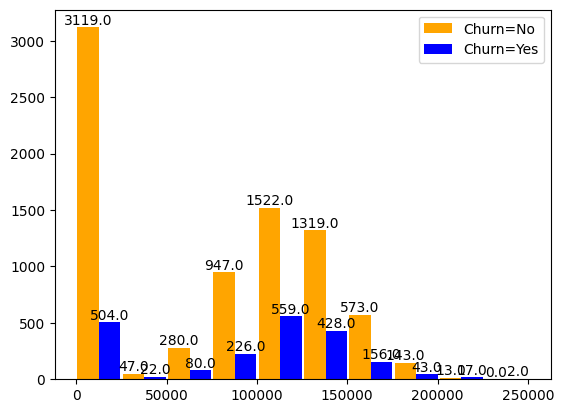

In [17]:
#Data Visualization
tenure_nochurn = df[df['Exited']==0].Balance
tenure_churn = df[df['Exited']==1].Balance
plt.hist([tenure_nochurn,tenure_churn], rwidth=0.95, color=['orange','blue'],label=['Churn=No','Churn=Yes'])
plt.legend()
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

In [18]:
selected_features = ['CreditScore', 'Gender', 'Tenure', 'Balance', 'IsActiveMember', 'Exited']
df1 = df[selected_features]
df.head()
# Calculate churn rate for each category of selected features
churn_rate = df.groupby(['Exited', 'Gender', 'Tenure', 'IsActiveMember']).size().unstack(fill_value=0)
churn_rate['Churn Rate'] = churn_rate[1] / (churn_rate[0] + churn_rate[1]) * 100

churn_rate
# Find the categories with the highest churn rate


IsActiveMember          0    1  Churn Rate
Exited Gender Tenure                      
0      Female 0        71   78   52.348993
              1       135  213   61.206897
              2       161  206   56.130790
              3       158  192   54.857143
              4       148  187   55.820896
              5       162  162   50.000000
              6       155  197   55.965909
              7       166  198   54.395604
              8       148  176   54.320988
              9       147  165   52.884615
              10       83   96   53.631285
       Male   0        69  100   59.171598
              1       186  269   59.120879
              2       198  282   58.750000
              3       198  248   55.605381
              4       207  244   54.101996
              5       209  270   56.367432
              6       188  231   55.131265
              7       216  271   55.646817
              8       233  271   53.769841
              9       216  243   52.941176
              10       93  117   55.714286
1      Female 0        29   26   47.272727
              1        84   46   35.384615
              2        74   39   34.513274
              3        69   50   42.016807
              4        75   32   29.906542
              5        82   42   33.870968
              6        65   41   38.679245
              7        66   34   34.000000
              8        69   40   36.697248
              9        72   38   34.545455
              10       40   26   39.393939
       Male   0        25   15   37.500000
              1        61   41   40.196078
              2        55   33   37.500000
              3        60   34   36.170213
              4        59   37   38.541667
              5        53   32   37.647059
              6        60   30   33.333333
              7        45   32   41.558442
              8        56   32   36.363636
              9        78   25   24.271845
              10       25   10   28.571429

In [19]:
max_churn_rate = churn_rate['Churn Rate'].idxmax()
max_churn_rate_value = churn_rate['Churn Rate'].max()

print("Feature combination with the highest churn rate:")
print(max_churn_rate)
print("Churn Rate:", max_churn_rate_value)

# by this we will get to know that females with tenure of 1 year has highest churn rate

Feature combination with the highest churn rate:
(0, 'Female', 1)
Churn Rate: 61.206896551724135


In [20]:
selected_features = ['CreditScore', 'Gender', 'Tenure', 'Balance', 'IsActiveMember', 'Exited']
df1 = df[selected_features]
df.head()
# Calculate churn rate for each category of selected features added credictscore as a extra feature
churn_rate = df.groupby(['Exited', 'Gender', 'Tenure','CreditScore', 'IsActiveMember']).size().unstack(fill_value=0)
churn_rate['Churn Rate'] = churn_rate[1] / (churn_rate[0] + churn_rate[1]) * 100

churn_rate
# Find the categories with the highest churn rate


IsActiveMember                    0  1  Churn Rate
Exited Gender Tenure CreditScore                  
0      Female 0      416          0  1       100.0
                     437          1  0         0.0
                     488          1  0         0.0
                     490          0  1       100.0
                     491          0  1       100.0
...                              .. ..         ...
1      Male   10     745          0  1       100.0
                     762          0  1       100.0
                     809          0  1       100.0
                     811          1  0         0.0
                     850          2  0         0.0

[6534 rows x 3 columns]

In [21]:
max_churn_rate = churn_rate['Churn Rate'].idxmax()
max_churn_rate_value = churn_rate['Churn Rate'].max()

print("Feature combination with the highest churn rate:")
print(max_churn_rate)
print("Churn Rate:", max_churn_rate_value)

Feature combination with the highest churn rate:
(0, 'Female', 0, 416)
Churn Rate: 100.0


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df = pd.get_dummies(data = df,columns=['Geography'])
df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [25]:
df.info()#no text data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  bool   
 11  Geography_Germany  10000 non-null  bool   
 12  Geography_Spain    10000 non-null  bool   
dtypes: bool(3), float64(2), int64(8)
memory usage: 810.7 KB


(array([509., 478., 491., 477., 498., 508., 507., 520., 510., 492., 536.,
        491., 505., 502., 521., 461., 478., 531., 475., 510.]),
 array([1.15800000e+01, 1.00106250e+04, 2.00096700e+04, 3.00087150e+04,
        4.00077600e+04, 5.00068050e+04, 6.00058500e+04, 7.00048950e+04,
        8.00039400e+04, 9.00029850e+04, 1.00002030e+05, 1.10001075e+05,
        1.20000120e+05, 1.29999165e+05, 1.39998210e+05, 1.49997255e+05,
        1.59996300e+05, 1.69995345e+05, 1.79994390e+05, 1.89993435e+05,
        1.99992480e+05]),
 <BarContainer object of 20 artists>)

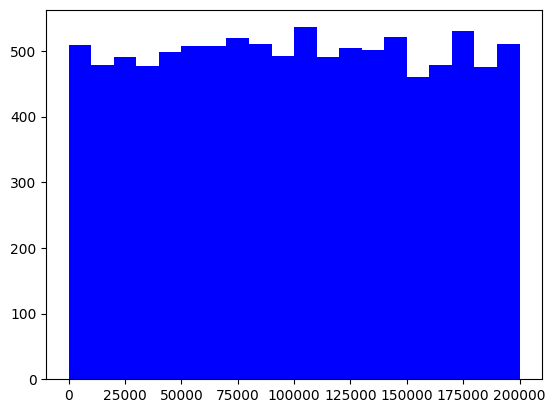

In [26]:
plt.hist(df['EstimatedSalary'],bins = 20,color='blue')
    
    

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
RS = RobustScaler()
features_scale = ['CreditScore','Age','Balance','EstimatedSalary']
features_scaled = RS.fit_transform(df[features_scale])

In [29]:
type(features_scaled)

numpy.ndarray

In [30]:
feature_scale_df = pd.DataFrame(features_scaled,columns=features_scale)

In [31]:
feature_scale_df.head()

,CreditScore,Age,Balance,EstimatedSalary
0,-0.246269,0.416667,-0.761480,0.011739
1,-0.328358,0.333333,-0.104906,0.125512
2,-1.119403,0.416667,0.489346,0.139630
3,0.350746,0.166667,-0.761480,-0.064717
4,1.477612,0.500000,0.221806,-0.214561


In [32]:
df[features_scale] =feature_scale_df

In [33]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,-0.246269,0,0.416667,2,-0.761480,1,1,1,0.011739,1,True,False,False
1,-0.328358,0,0.333333,1,-0.104906,1,0,1,0.125512,0,False,False,True
2,-1.119403,0,0.416667,8,0.489346,3,1,0,0.139630,1,True,False,False
3,0.350746,0,0.166667,1,-0.761480,2,0,0,-0.064717,0,True,False,False
4,1.477612,0,0.500000,2,0.221806,1,1,1,-0.214561,0,False,False,True


In [34]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [35]:
print(X_train.shape,X_test.shape)

(8000, 12) (2000, 12)


In [36]:
type(X_train)

pandas.core.frame.DataFrame

In [37]:
import tensorflow as tf
from tensorflow import keras

In [38]:
len(X_train.columns)

12

In [39]:
model = keras.Sequential([keras.layers.Dense(12,input_shape = (12,),activation = 'relu'),
                         keras.layers.Dense(6,activation = 'relu'),
                         keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100


/Users/ammu/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.7860 - loss: 0.5278
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - accuracy: 0.7888 - loss: 0.4586
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - accuracy: 0.7904 - loss: 0.4428
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.8035 - loss: 0.4398
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.8140 - loss: 0.4261
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8152 - loss: 0.4259
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.8165 - loss: 0.4206
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - accuracy: 0.8343 - loss: 0.4004
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.8318 - loss: 0.4115
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.8310 - loss: 0.4094
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.8298 - loss: 0.4111
Epoch 12/100
250/250 ━━━━━━━━━━

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - accuracy: 0.8486 - loss: 0.3626
Epoch 68/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - accuracy: 0.8480 - loss: 0.3578
Epoch 69/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - accuracy: 0.8504 - loss: 0.3622
Epoch 70/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.8527 - loss: 0.3543
Epoch 71/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.8546 - loss: 0.3545
Epoch 72/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.8570 - loss: 0.3379
Epoch 73/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.8702 - loss: 0.3289
Epoch 74/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.8617 - loss: 0.3423
Epoch 75/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.8614 - loss: 0.3406
Epoch 76/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - accuracy: 0.8612 - loss: 0.3427
Epoch 77/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.8669 - loss: 0.3267
Epoch 78/100
250/250 ━━

In [40]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step


In [41]:
y_pred
print(type(y_pred))

<class 'numpy.ndarray'>


In [42]:
y_pred =map(lambda x: 1 if x>0.5 else 0, y_pred)


In [43]:
y_pred=  pd.Series(y_pred)

In [44]:
y_pred[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
dtype: int64

In [45]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [46]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1595
           1       0.75      0.41      0.53       405

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

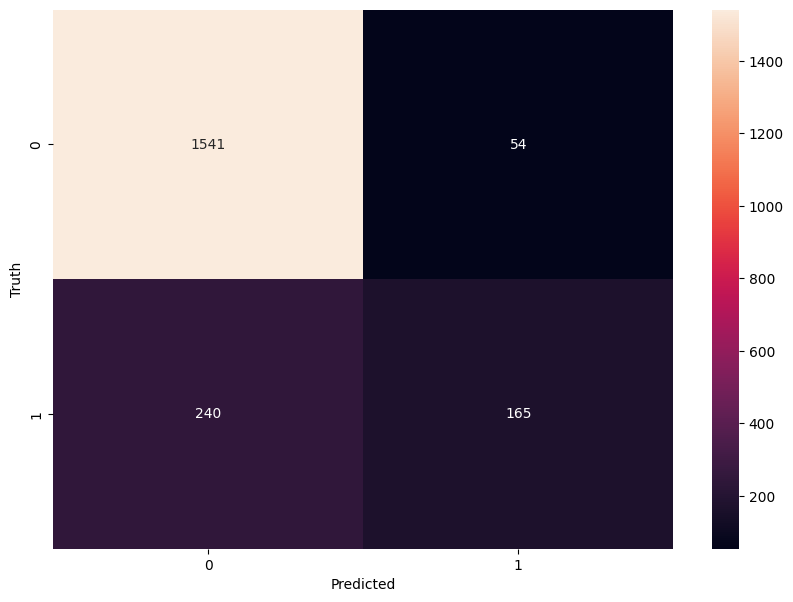

In [47]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
# handeling the imbalanced data set using under,over,smote and ensemble
#1 Under sampeling
#given data set 
#0    7963
#1    2037

df_0 = df[df['Exited'] == 0]


In [49]:
df_1 = df[df['Exited']== 1]

In [50]:
df_1 = pd.DataFrame(df_1)

In [51]:
df_1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,-0.246269,0,0.416667,2,-0.761480,1,1,1,0.011739,1,True,False,False
2,-1.119403,0,0.416667,8,0.489346,3,1,0,0.139630,1,True,False,False
5,-0.052239,1,0.583333,8,0.129714,2,1,0,0.503758,1,False,False,True
7,-2.059701,0,-0.666667,4,0.139828,4,1,0,0.194671,1,False,True,False
16,0.007463,1,1.750000,1,0.277367,1,1,0,-0.966561,1,False,True,False


In [52]:
df_0.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1,-0.328358,0,0.333333,1,-0.104906,1,0,1,0.125512,0,False,False,True
3,0.350746,0,0.166667,1,-0.761480,2,0,0,-0.064717,0,True,False,False
4,1.477612,0,0.500000,2,0.221806,1,1,1,-0.214561,0,False,False,True
6,1.268657,1,1.083333,7,-0.761480,2,1,1,-0.916096,0,True,False,False
8,-1.126866,1,0.583333,4,0.351387,2,0,1,-0.256677,0,True,False,False


In [53]:
print(df_0.shape,df_1.shape)

(7963, 13) (2037, 13)


In [54]:
df_under_sample = df_0.sample(len(df_1),random_state = 42)

In [55]:
df_under_sample.shape

(2037, 13)

In [56]:
new_df = pd.concat([df_under_sample,df_1],axis = 0)

In [57]:
new_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8165,-0.343284,1,0.000000,8,0.450581,2,1,0,-0.112767,0,False,False,True
6409,0.231343,0,-0.333333,9,-0.761480,2,1,1,-0.624168,0,True,False,False
2157,0.686567,0,0.583333,3,-0.761480,2,1,1,0.902792,0,True,False,False
1618,0.335821,1,-0.833333,8,0.344905,2,1,0,-0.097603,0,True,False,False
1633,-0.671642,1,-0.166667,7,-0.761480,1,0,0,-0.521661,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,-1.149254,1,0.416667,3,0.429641,1,1,1,-0.475156,1,False,True,False
9982,0.022388,0,0.750000,7,0.312952,1,1,0,0.151978,1,False,True,False
9991,-0.410448,0,1.333333,4,-0.069077,1,1,0,-0.313146,1,True,False,False
9997,0.425373,0,-0.083333,7,-0.761480,1,0,1,-0.590615,1,True,False,False


In [58]:
X = new_df.drop('Exited',axis = 1)
y = new_df['Exited']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify = y)

In [60]:
y_train.value_counts()

Exited
0    1630
1    1629
Name: count, dtype: int64

In [61]:
def ANN(X_train, X_test, y_train, y_test , Loss):

    model = keras.Sequential([keras.layers.Dense(12,input_shape = (12,),activation = 'relu'),
                             keras.layers.Dense(6,activation = 'relu'),
                             keras.layers.Dense(1, activation='sigmoid')])
    
    model.compile(optimizer='adam',
                  loss=Loss,
                  metrics=['accuracy'])
    
    model.fit(X_train,y_train,epochs=100)
   
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    print(classification_report(y_test,y_pred))
    
    return y_pred

In [62]:
y_pred = ANN(X_train, X_test, y_train, y_test , 'binary_crossentropy')
# the recall and f1 score got improved for 0

Epoch 1/100


/Users/ammu/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.5482 - loss: 0.6981 
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.6798 - loss: 0.6332
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.7208 - loss: 0.5988
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.7150 - loss: 0.5894
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.7283 - loss: 0.5659
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7093 - loss: 0.5776
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7220 - loss: 0.5733
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - accuracy: 0.7356 - loss: 0.5614
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - accuracy: 0.7109 - loss: 0.5812
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 0.7202 - loss: 0.5679
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7211 - loss: 0.5647
Epoch 12/100
102/102 ━━━━━━━━━

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7550 - loss: 0.4955
Epoch 68/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - accuracy: 0.7482 - loss: 0.5080
Epoch 69/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7495 - loss: 0.4938
Epoch 70/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7461 - loss: 0.4997
Epoch 71/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7339 - loss: 0.5175
Epoch 72/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - accuracy: 0.7647 - loss: 0.4834
Epoch 73/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - accuracy: 0.7680 - loss: 0.4767
Epoch 74/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7575 - loss: 0.4863
Epoch 75/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - accuracy: 0.7684 - loss: 0.4751
Epoch 76/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7620 - loss: 0.4797
Epoch 77/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - accuracy: 0.7673 - loss: 0.4825
Epoch 78/100
102/102 ━━

In [63]:
def Con_mat(y_test,y_pred):
    cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    print("Confusion Matrix:")
    print(cm.numpy())

Confusion Matrix:
[[316  91]
 [128 280]]


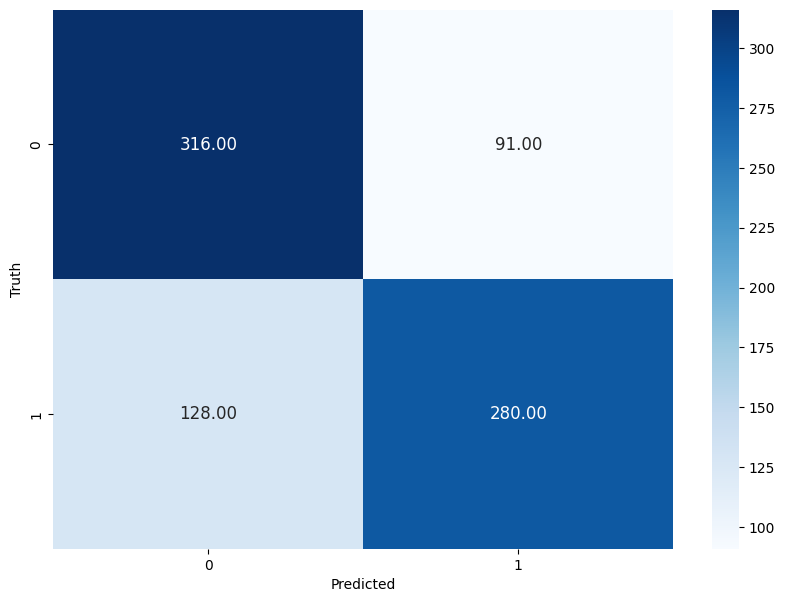

In [64]:
Con_mat(y_test,y_pred)

In [65]:
#OVER SAMPELING

In [66]:
df_over_sample_1 = df_1.sample(len(df_0),replace = True)

In [67]:
print(df_over_sample_1.shape,df_0.shape)

(7963, 13) (7963, 13)


In [68]:
new_df_oversampeling = pd.concat([df_over_sample_1,df_0],axis = 0)
new_df_oversampeling.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
7801,0.194030,1,1.416667,7,0.248475,1,0,0,0.930541,1,True,False,False
4218,-0.470149,0,-1.500000,9,-0.107356,1,1,1,0.435309,1,False,True,False
6899,-0.619403,1,2.416667,2,-0.761480,1,1,0,0.310921,1,True,False,False
1082,0.268657,1,-0.083333,0,-0.058179,1,1,0,0.784559,1,False,False,True
6704,-1.611940,1,0.666667,3,0.055941,2,1,1,0.847135,1,False,True,False


In [69]:
X = new_df_oversampeling.drop('Exited',axis = 1)
y = new_df_oversampeling['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify = y)

In [70]:
y_pred = ANN(X_train, X_test, y_train, y_test , 'binary_crossentropy')

Epoch 1/100


/Users/ammu/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.5990 - loss: 0.6715
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.7064 - loss: 0.5828
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - accuracy: 0.7043 - loss: 0.5816
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.7115 - loss: 0.5737
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.7175 - loss: 0.5688
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.7087 - loss: 0.5709
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.7177 - loss: 0.5610
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.7304 - loss: 0.5424
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.7266 - loss: 0.5347
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 0.7468 - loss: 0.5139
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - accuracy: 0.7497 - loss: 0.5077
Epoch 12/100
399/399 ━━━━━━━━━━

399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.7845 - loss: 0.4376
Epoch 68/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.7836 - loss: 0.4411
Epoch 69/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.7931 - loss: 0.4366
Epoch 70/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.7839 - loss: 0.4486
Epoch 71/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.7929 - loss: 0.4319
Epoch 72/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.7876 - loss: 0.4389
Epoch 73/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.7844 - loss: 0.4410
Epoch 74/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.7878 - loss: 0.4439
Epoch 75/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.7855 - loss: 0.4459
Epoch 76/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.7921 - loss: 0.4395
Epoch 77/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.7834 - loss: 0.4428
Epoch 78/100
399/399 ━━

Confusion Matrix:
[[1258  335]
 [ 315 1278]]


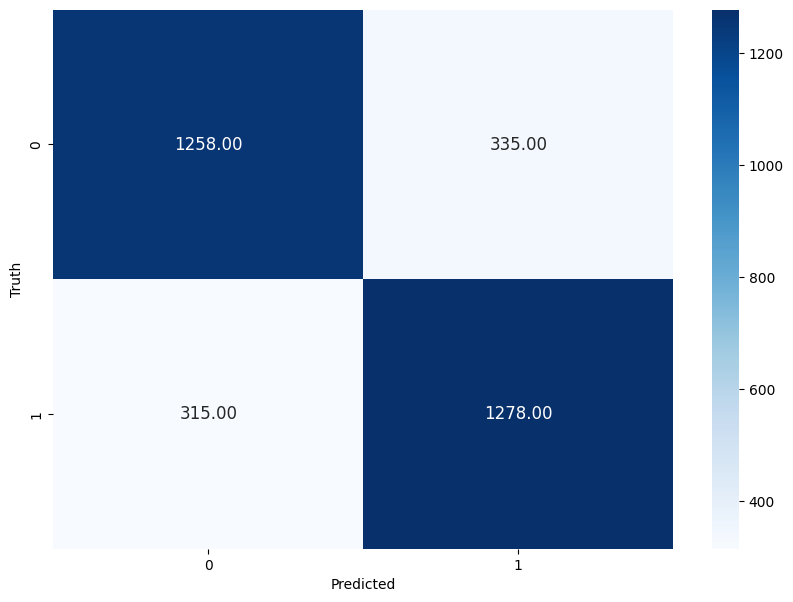

In [71]:
#confusion Matrix
Con_mat(y_test,y_pred)

In [72]:
#SMOTE

In [73]:
#pip install imbalanced-learn
#--- to install SMOTE in terminal

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
X = df.drop('Exited',axis = 1)
y = df['Exited']

In [76]:
Smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = Smote.fit_resample(X,y)
y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=5,stratify = y_sm)

In [78]:
y_pred = ANN(X_train, X_test, y_train, y_test , 'binary_crossentropy')

Epoch 1/100


/Users/ammu/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.5020 - loss: 0.7199
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.6954 - loss: 0.6188
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.7249 - loss: 0.5616
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.7266 - loss: 0.5459
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.7413 - loss: 0.5257
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.7494 - loss: 0.5094
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.7663 - loss: 0.4891
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.7637 - loss: 0.4885
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.7756 - loss: 0.4760
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.7775 - loss: 0.4680
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.7835 - loss: 0.4649
Epoch 12/100
399/399 ━━━━━━━━━━

399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.8071 - loss: 0.4068
Epoch 68/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.8041 - loss: 0.4121
Epoch 69/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.8099 - loss: 0.4039
Epoch 70/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.8148 - loss: 0.4047
Epoch 71/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.8132 - loss: 0.4059
Epoch 72/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.8112 - loss: 0.4075
Epoch 73/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.8080 - loss: 0.4079
Epoch 74/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.8099 - loss: 0.4041
Epoch 75/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.8088 - loss: 0.4060
Epoch 76/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 0.8170 - loss: 0.3995
Epoch 77/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.8083 - loss: 0.4078
Epoch 78/100
399/399 ━━

Confusion Matrix:
[[1393  200]
 [ 392 1201]]


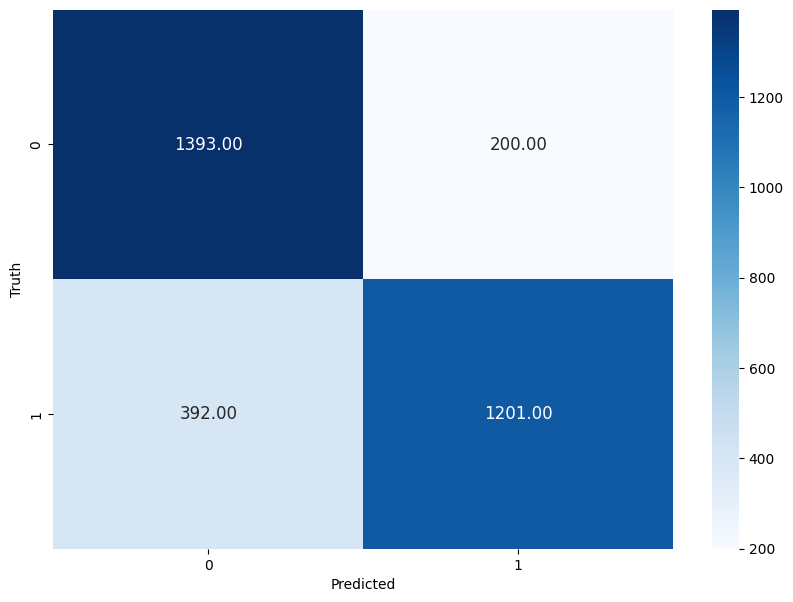

In [79]:
#confusion Matrix
Con_mat(y_test,y_pred)

In [80]:
#Ensemble